<a href="https://colab.research.google.com/github/hotaf/Covid19/blob/master/VisualizationOfMiddleEast_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Visualization**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import math

In [0]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [0]:
covid_df = pd.read_csv("covid_19_data.csv")
covid_df.describe()

,SNo,Confirmed,Deaths,Recovered
count,9117.000000,9117.000000,9117.000000,9117.000000
mean,4559.000000,766.820774,28.791927,255.273994
std,2631.995536,5322.616735,283.310806,2838.560708
min,1.000000,0.000000,0.000000,0.000000
25%,2280.000000,2.000000,0.000000,0.000000
50%,4559.000000,21.000000,0.000000,0.000000
75%,6838.000000,162.000000,1.000000,10.000000
max,9117.000000,80589.000000,8215.000000,61201.000000


In [0]:
print('num of countries: '+ str(covid_df['Country/Region'].nunique()) + ' unique Country/Region values')

num of countries: 210 unique Country/Region values


In [0]:
print('Worldwide Confirmed Cases: ',covid_df['Confirmed'].sum())
print('Worldwide Deaths: ',covid_df['Deaths'].sum())
print('Worldwide Recovered Cases: ',covid_df['Recovered'].sum())

Worldwide Confirmed Cases:  6991105.0
Worldwide Deaths:  262496.0
Worldwide Recovered Cases:  2327333.0


In [0]:
df_4 = covid_df[['ObservationDate','Country/Region','Confirmed','Deaths','Recovered']]
df_4.head()
df_4.sort_values(by='Confirmed', ascending=False)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
8888,03/26/2020,Italy,80589.0,8215.0,10361.0
8586,03/25/2020,Italy,74386.0,7503.0,9362.0
8285,03/24/2020,Italy,69176.0,6820.0,8326.0
8420,03/24/2020,Mainland China,67801.0,3160.0,60324.0
9027,03/26/2020,Mainland China,67801.0,3169.0,61201.0
...,...,...,...,...,...
3083,03/02/2020,US,0.0,0.0,0.0
3082,03/02/2020,US,0.0,0.0,0.0
3081,03/02/2020,US,0.0,0.0,0.0
116,01/24/2020,Mainland China,0.0,0.0,0.0


In [0]:
lastest_full_countries_df = covid_df.groupby(['Country/Region'])[['ObservationDate','Confirmed','Deaths','Recovered']].max().reset_index()
lastest_full_countries_df.head()

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,02/28/2020,1.0,0.0,0.0
1,"('St. Martin',)",03/10/2020,2.0,0.0,0.0
2,Afghanistan,03/26/2020,94.0,4.0,2.0
3,Albania,03/26/2020,174.0,6.0,17.0
4,Algeria,03/26/2020,367.0,25.0,65.0


In [0]:
lastest_full_countries_df['Acrive_Confirmed'] = (lastest_full_countries_df['Confirmed']-(lastest_full_countries_df['Recovered']+lastest_full_countries_df['Deaths']))

Ksa = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Saudi Arabia'][['Acrive_Confirmed','Recovered','Deaths']].iloc[0]
uae = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='United Arab Emirates'][['Acrive_Confirmed','Recovered','Deaths']].iloc[0]
kuwait = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Kuwait'][['Acrive_Confirmed','Recovered','Deaths']].iloc[0]
oman = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Oman'][['Acrive_Confirmed','Recovered','Deaths']].iloc[0]
bahrain = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Bahrain'][['Acrive_Confirmed','Recovered','Deaths']].iloc[0]
Qatar = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Qatar'][['Acrive_Confirmed','Recovered','Deaths']].iloc[0]


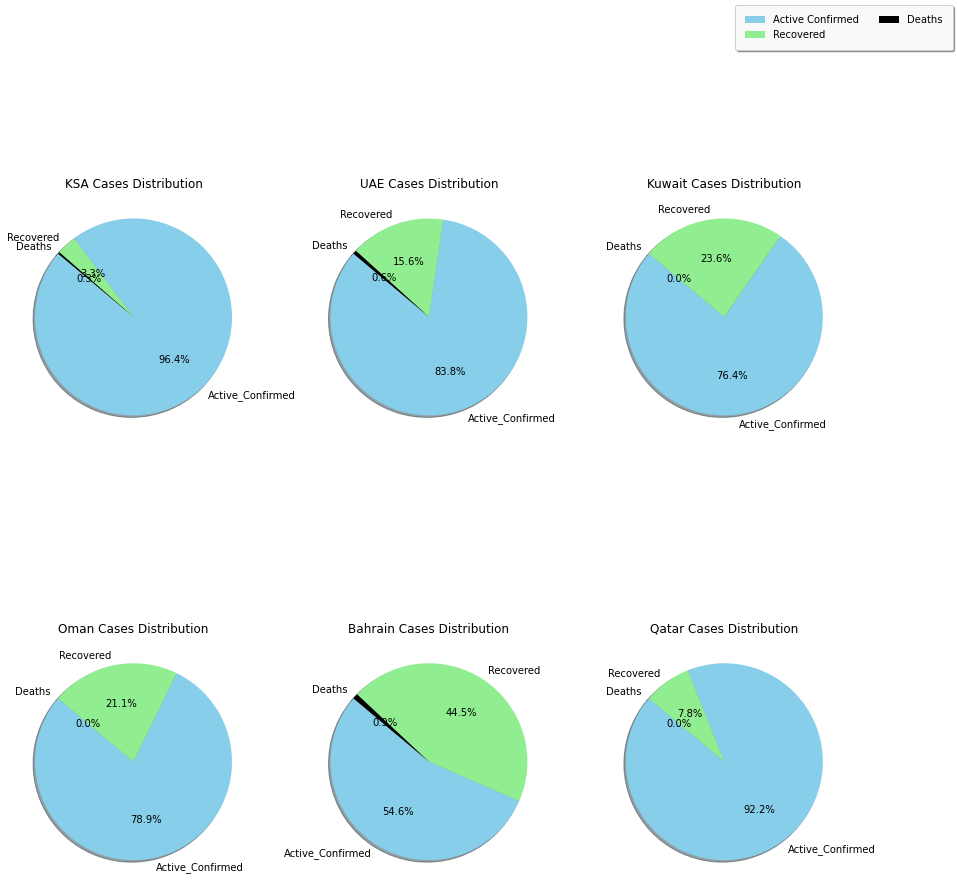

In [0]:
fig, axes = plt.subplots(
                     ncols=3,
                     nrows=2,
                     figsize=(15, 15))

ax1, ax2, ax3, ax4, ax5, ax6= axes.flatten()

colors = ['skyblue','lightgreen','k']
ax1.pie(Ksa
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Active_Confirmed','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax1.set_title("KSA Cases Distribution")

ax2.pie(uae
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Active_Confirmed','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax2.set_title("UAE Cases Distribution")

ax3.pie(kuwait
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Active_Confirmed','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax3.set_title("Kuwait Cases Distribution")

ax4.pie(oman
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Active_Confirmed','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax4.set_title("Oman Cases Distribution")
ax5.pie(bahrain
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Active_Confirmed','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax5.set_title("Bahrain Cases Distribution")
ax6.pie(Qatar
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Active_Confirmed','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax6.set_title("Qatar Cases Distribution")

fig.legend(['Active Confirmed','Recovered','Deaths']
           , loc = "upper right"
           , frameon = True
           , fontsize = 10
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

plt.show();

In [0]:
plt.savefig('MiddleEast.png')

<Figure size 432x288 with 0 Axes>